Problem statement

Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 

### Books dataset

#### Exploratory Data Analysis

In [1]:
# Necessary libraries
# Analysis
import pandas as pd

# Association rules related
from mlxtend.frequent_patterns import apriori, association_rules

# Visualization
import matplotlib.pyplot as plt

# Warnings
import warnings

warnings.filterwarnings('ignore')

C:\Users\umesh\anaconda3\Lib\site-packages\pyparsing.py:108: DeprecationWarning: module 'sre_constants' is deprecated
  import sre_constants


In [2]:
# Dataset - 1: 

books = pd.read_csv(r"D:\Education\Data science\Assignments\9 Association rules\book.csv")

#Glance of dataset
books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
#1. Shape of dataset
books.shape

(2000, 11)

In [4]:
#2. Technical info
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [5]:
#3. Presence of null values
books.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [6]:
#4. Statistical summary
books.describe().T

,count,mean,std,min,25%,50%,75%,max
ChildBks,2000.0,0.4230,0.494159,0.0,0.0,0.0,1.0,1.0
YouthBks,2000.0,0.2475,0.431668,0.0,0.0,0.0,0.0,1.0
CookBks,2000.0,0.4310,0.495340,0.0,0.0,0.0,1.0,1.0
DoItYBks,2000.0,0.2820,0.450086,0.0,0.0,0.0,1.0,1.0
RefBks,2000.0,0.2145,0.410578,0.0,0.0,0.0,0.0,1.0
ArtBks,2000.0,0.2410,0.427797,0.0,0.0,0.0,0.0,1.0
GeogBks,2000.0,0.2760,0.447129,0.0,0.0,0.0,1.0,1.0
ItalCook,2000.0,0.1135,0.317282,0.0,0.0,0.0,0.0,1.0
ItalAtlas,2000.0,0.0370,0.188809,0.0,0.0,0.0,0.0,1.0
ItalArt,2000.0,0.0485,0.214874,0.0,0.0,0.0,0.0,1.0


Observation:
1. Dataset has 2000 transactions and 11 different books.
2. Dataset is in the transaction form.
3. No null values observed.

#### Association rules mining

##### Apriori - Frequent items table

In [7]:
# Frequent items set for different support and set length
for support in range(1, 10):
    print('Minimum support value: ', support/10)
    for length in range(1, 12):
        frequent_items = apriori(books, min_support=support/10, use_colnames=True, max_len=length)
        print('Frequent items table - ')
        print('Max set length: ', length)
        print(frequent_items)
        print()
    print()

Minimum support value:  0.1
Frequent items table - 
Max set length:  1
   support    itemsets
0   0.4230  (ChildBks)
1   0.2475  (YouthBks)
2   0.4310   (CookBks)
3   0.2820  (DoItYBks)
4   0.2145    (RefBks)
5   0.2410    (ArtBks)
6   0.2760   (GeogBks)
7   0.1135  (ItalCook)
8   0.1085  (Florence)

Frequent items table - 
Max set length:  2
    support              itemsets
0    0.4230            (ChildBks)
1    0.2475            (YouthBks)
2    0.4310             (CookBks)
3    0.2820            (DoItYBks)
4    0.2145              (RefBks)
5    0.2410              (ArtBks)
6    0.2760             (GeogBks)
7    0.1135            (ItalCook)
8    0.1085            (Florence)
9    0.1650  (YouthBks, ChildBks)
10   0.2560   (ChildBks, CookBks)
11   0.1840  (ChildBks, DoItYBks)
12   0.1515    (RefBks, ChildBks)
13   0.1625    (ChildBks, ArtBks)
14   0.1950   (GeogBks, ChildBks)
15   0.1620   (YouthBks, CookBks)
16   0.1155  (YouthBks, DoItYBks)
17   0.1010    (YouthBks, ArtBks)
18   0.12

Frequent items table - 
Max set length:  1
   support    itemsets
0   0.4230  (ChildBks)
1   0.2475  (YouthBks)
2   0.4310   (CookBks)
3   0.2820  (DoItYBks)
4   0.2145    (RefBks)
5   0.2410    (ArtBks)
6   0.2760   (GeogBks)

Frequent items table - 
Max set length:  2
   support             itemsets
0   0.4230           (ChildBks)
1   0.2475           (YouthBks)
2   0.4310            (CookBks)
3   0.2820           (DoItYBks)
4   0.2145             (RefBks)
5   0.2410             (ArtBks)
6   0.2760            (GeogBks)
7   0.2560  (ChildBks, CookBks)

Frequent items table - 
Max set length:  3
   support             itemsets
0   0.4230           (ChildBks)
1   0.2475           (YouthBks)
2   0.4310            (CookBks)
3   0.2820           (DoItYBks)
4   0.2145             (RefBks)
5   0.2410             (ArtBks)
6   0.2760            (GeogBks)
7   0.2560  (ChildBks, CookBks)

Frequent items table - 
Max set length:  4
   support             itemsets
0   0.4230           (ChildBks)
1

Frequent items table - 
Max set length:  10
Empty DataFrame
Columns: [support, itemsets]
Index: []

Frequent items table - 
Max set length:  11
Empty DataFrame
Columns: [support, itemsets]
Index: []


Minimum support value:  0.9
Frequent items table - 
Max set length:  1
Empty DataFrame
Columns: [support, itemsets]
Index: []

Frequent items table - 
Max set length:  2
Empty DataFrame
Columns: [support, itemsets]
Index: []

Frequent items table - 
Max set length:  3
Empty DataFrame
Columns: [support, itemsets]
Index: []

Frequent items table - 
Max set length:  4
Empty DataFrame
Columns: [support, itemsets]
Index: []

Frequent items table - 
Max set length:  5
Empty DataFrame
Columns: [support, itemsets]
Index: []

Frequent items table - 
Max set length:  6
Empty DataFrame
Columns: [support, itemsets]
Index: []

Frequent items table - 
Max set length:  7
Empty DataFrame
Columns: [support, itemsets]
Index: []

Frequent items table - 
Max set length:  8
Empty DataFrame
Columns: [support, 

Observation:

From above frequent items list minimum support of 10% and max length of sets 3 can be considered for applying association rules.

##### Application of association rules

In [8]:
# Applying association rules for considered frequent items table

#Considered frequent items 
freq_items = apriori(books, min_support=0.1, use_colnames=True, max_len=3)

# Association rules for different confident values
for confidence_level in range(1, 9):
    rules = association_rules(freq_items, min_threshold=confidence_level/10, metric='confidence')
    print('Association rules at confidence level: ', confidence_level * 10, '%')
    print(rules)
    print()

Association rules at confidence level:  10 %
           antecedents         consequents  antecedent support  \
0           (YouthBks)          (ChildBks)              0.2475   
1           (ChildBks)          (YouthBks)              0.4230   
2           (ChildBks)           (CookBks)              0.4230   
3            (CookBks)          (ChildBks)              0.4310   
4           (ChildBks)          (DoItYBks)              0.4230   
..                 ...                 ...                 ...   
95  (GeogBks, CookBks)            (ArtBks)              0.1925   
96   (ArtBks, CookBks)           (GeogBks)              0.1670   
97           (GeogBks)   (ArtBks, CookBks)              0.2760   
98            (ArtBks)  (GeogBks, CookBks)              0.2410   
99           (CookBks)   (GeogBks, ArtBks)              0.4310   

    consequent support  support  confidence      lift  leverage  conviction  \
0               0.4230   0.1650    0.666667  1.576044  0.060308    1.731000   
1   

Observation:

From above different association rules, 60% confidence level is considered for further analysis.

In [9]:
#Association rules at 60% confidence level
rules_60 = association_rules(freq_items, min_threshold=0.6, metric='confidence')
rules_60

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
2,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
3,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
4,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986
5,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
6,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
7,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968,0.489939
8,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556,0.501303
9,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095,0.498047


In [10]:
# Sorting rules according to conviction
# Higher the conviction higher is the dependency of consequent on antecedents
rules_60.sort_values('conviction', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf,0.641850
26,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159,0.542591
27,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354,0.546010
28,"(GeogBks, ArtBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
16,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345
17,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083,0.558594
23,"(GeogBks, ArtBks)",(ChildBks),0.1275,0.423,0.1020,0.800000,1.891253,0.048067,2.885000,0.540115
13,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545,0.559416
14,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158,0.559831
22,"(GeogBks, DoItYBks)",(ChildBks),0.1325,0.423,0.1045,0.788679,1.864490,0.048452,2.730446,0.534479


#### Visualization

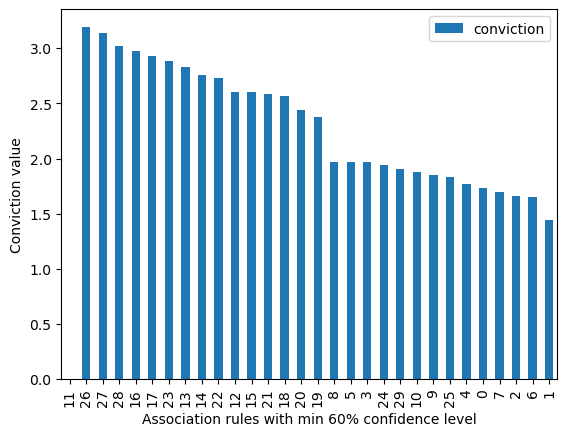

In [11]:
# Visualization of association rules wrt convition

df_60 = rules_60[['antecedents', 'conviction']].sort_values('conviction', ascending=False)
df_60.plot(kind='bar')
plt.xlabel('Association rules with min 60% confidence level')
plt.ylabel('Conviction value')
plt.show()

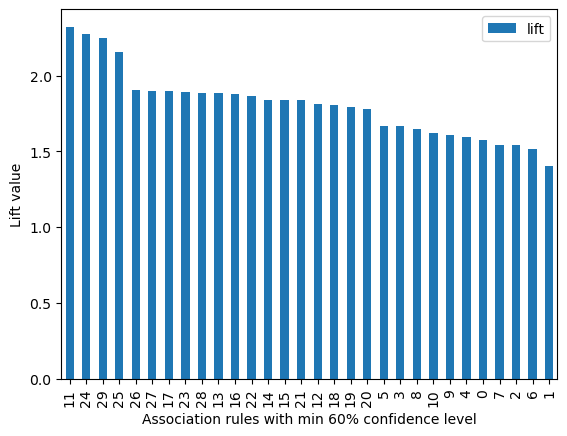

In [12]:
# Visualization of association rules wrt lift
df_60 = rules_60[['antecedents', 'lift']].sort_values('lift', ascending=False)
df_60.plot(kind='bar')
plt.xlabel('Association rules with min 60% confidence level')
plt.ylabel('Lift value')
plt.show()

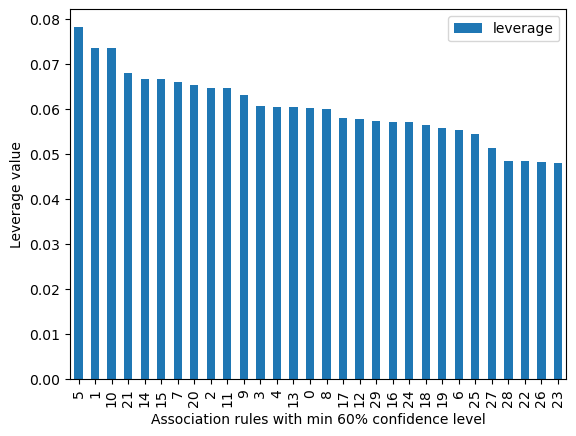

In [13]:
# Visualization of association rules wrt leverage
df_60 = rules_60[['antecedents', 'leverage']].sort_values('leverage', ascending=False)
df_60.plot(kind='bar')
plt.xlabel('Association rules with min 60% confidence level')
plt.ylabel('Leverage value')
plt.show()

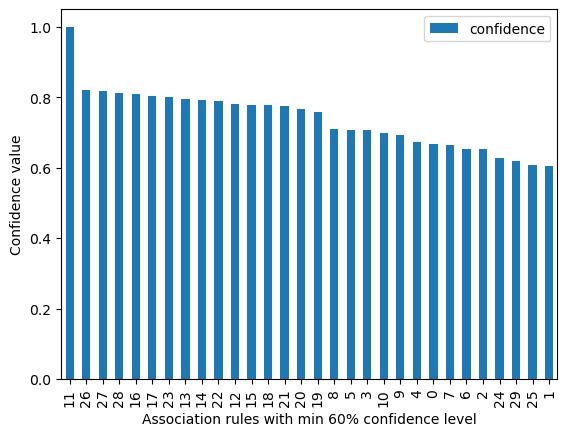

In [14]:
# Visualization of association rules wrt confidence
df_60 = rules_60[['antecedents', 'confidence']].sort_values('confidence', ascending=False)
df_60.plot(kind='bar')
plt.xlabel('Association rules with min 60% confidence level')
plt.ylabel('Confidence value')
plt.show()

### Movies dataset

#### Exploratory Data Analysis

In [15]:
# Dataset - 2: 
movies = pd.read_csv(r"D:\Education\Data science\Assignments\9 Association rules\my_movies.csv")

#Glance of dataset
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [16]:
#1. Shape of dataset
movies.shape

(10, 15)

In [17]:
#2. Seperation of transaction form of dataset and Item list 
movies_tf = movies.iloc[:,5:]
movies_tf

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [18]:
movies_df = movies.iloc[:,:5]
movies_df

,V1,V2,V3,V4,V5
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2
1,Gladiator,Patriot,Braveheart,NaN,NaN
2,LOTR1,LOTR2,NaN,NaN,NaN
3,Gladiator,Patriot,Sixth Sense,NaN,NaN
4,Gladiator,Patriot,Sixth Sense,NaN,NaN
5,Gladiator,Patriot,Sixth Sense,NaN,NaN
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN
7,Gladiator,Patriot,NaN,NaN,NaN
8,Gladiator,Patriot,Sixth Sense,NaN,NaN
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN


In [19]:
#3. Technical info about data
movies_tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 932.0 bytes


In [20]:
#4. Presence of null values
movies_tf.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [21]:
#5. Statistical summary of dataset
movies_tf.describe().T

,count,mean,std,min,25%,50%,75%,max
Sixth Sense,10.0,0.6,0.516398,0.0,0.00,1.0,1.0,1.0
Gladiator,10.0,0.7,0.483046,0.0,0.25,1.0,1.0,1.0
LOTR1,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Harry Potter1,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Patriot,10.0,0.6,0.516398,0.0,0.00,1.0,1.0,1.0
LOTR2,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Harry Potter2,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
LOTR,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
Braveheart,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
Green Mile,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0


Observation:
1. Dataset has 10 transactions and 10 different movies.
2. No null values observed.
3. Required transaction form of the table extracted.

#### Association rules mining

##### Apriori - Frequent items table

In [22]:
# Frequent items list with different support value and minimum length
for support in range(1, 10):
    for length in range(1, 10):
        frequent_movie  = apriori(movies_tf, min_support=support/10, 
                                  max_len=length, use_colnames=True)
        print(f'Frequent movie table with support: {support/10} and max set length: {length}')
        print(frequent_movie)
        print()
    print()

Frequent movie table with support: 0.1 and max set length: 1
   support         itemsets
0      0.6    (Sixth Sense)
1      0.7      (Gladiator)
2      0.2          (LOTR1)
3      0.2  (Harry Potter1)
4      0.6        (Patriot)
5      0.2          (LOTR2)
6      0.1  (Harry Potter2)
7      0.1           (LOTR)
8      0.1     (Braveheart)
9      0.2     (Green Mile)

Frequent movie table with support: 0.1 and max set length: 2
    support                        itemsets
0       0.6                   (Sixth Sense)
1       0.7                     (Gladiator)
2       0.2                         (LOTR1)
3       0.2                 (Harry Potter1)
4       0.6                       (Patriot)
5       0.2                         (LOTR2)
6       0.1                 (Harry Potter2)
7       0.1                          (LOTR)
8       0.1                    (Braveheart)
9       0.2                    (Green Mile)
10      0.5        (Sixth Sense, Gladiator)
11      0.1            (Sixth Sense, LOTR

Frequent movie table with support: 0.3 and max set length: 5
   support                           itemsets
0      0.6                      (Sixth Sense)
1      0.7                        (Gladiator)
2      0.6                          (Patriot)
3      0.5           (Sixth Sense, Gladiator)
4      0.4             (Patriot, Sixth Sense)
5      0.6               (Patriot, Gladiator)
6      0.4  (Patriot, Sixth Sense, Gladiator)

Frequent movie table with support: 0.3 and max set length: 6
   support                           itemsets
0      0.6                      (Sixth Sense)
1      0.7                        (Gladiator)
2      0.6                          (Patriot)
3      0.5           (Sixth Sense, Gladiator)
4      0.4             (Patriot, Sixth Sense)
5      0.6               (Patriot, Gladiator)
6      0.4  (Patriot, Sixth Sense, Gladiator)

Frequent movie table with support: 0.3 and max set length: 7
   support                           itemsets
0      0.6                      (

Observation:

From above frequent movie list minimum support of 20% and max length of sets 3 can be considered for applying association rules.

In [23]:
# Frequent movie set for applying association rules
freq_movie = apriori(movies_tf, min_support=.20, max_len=3, use_colnames=True)
freq_movie

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Sixth Sense, Green Mile)"


##### Application of association rules

In [24]:
# Applying association rules for different confidence level
for level in range(1, 10):
    movie_rules = association_rules(freq_movie, min_threshold=level/10, metric='confidence')
    print(f'Associatino rules at confidence level: {level/10} - ')
    print(movie_rules)
    print()

Associatino rules at confidence level: 0.1 - 
                 antecedents               consequents  antecedent support  \
0              (Sixth Sense)               (Gladiator)                 0.6   
1                (Gladiator)             (Sixth Sense)                 0.7   
2                  (Patriot)             (Sixth Sense)                 0.6   
3              (Sixth Sense)                 (Patriot)                 0.6   
4              (Sixth Sense)              (Green Mile)                 0.6   
5               (Green Mile)             (Sixth Sense)                 0.2   
6                  (Patriot)               (Gladiator)                 0.6   
7                (Gladiator)                 (Patriot)                 0.7   
8                    (LOTR2)                   (LOTR1)                 0.2   
9                    (LOTR1)                   (LOTR2)                 0.2   
10    (Patriot, Sixth Sense)               (Gladiator)                 0.4   
11      (Patriot, 

In [25]:
# Visualization of association rules at confidence level 70%
rules_70 = association_rules(freq_movie, min_threshold=0.7)
rules_70

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
5,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
6,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
7,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
8,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000


In [26]:
# Sorting rules according to conviction
# Higher the conviction higher is the dependency of consequent on antecedents
rules_70.sort_values('conviction', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
5,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
6,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
7,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
8,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333


#### Visualization

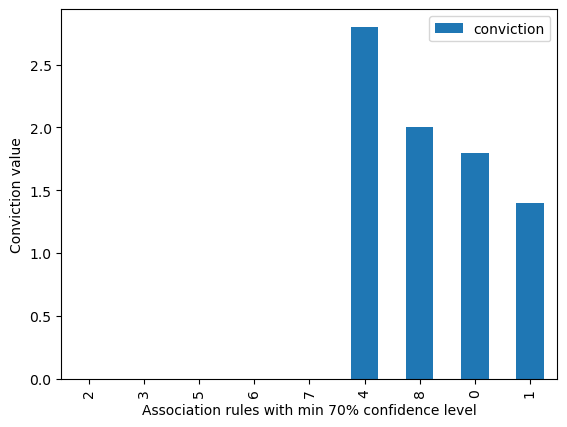

In [27]:
# Visualization of association rules wrt convition

df_70 = rules_70[['antecedents', 'conviction']].sort_values('conviction', ascending=False)
df_70.plot(kind='bar')
plt.xlabel('Association rules with min 70% confidence level')
plt.ylabel('Conviction value')
plt.show()

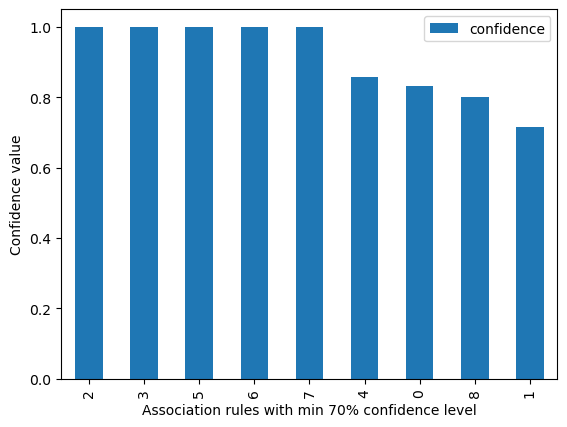

In [28]:
# Visualization of association rules wrt confidence

df_70 = rules_70[['antecedents', 'confidence']].sort_values('confidence', ascending=False)
df_70.plot(kind='bar')
plt.xlabel('Association rules with min 70% confidence level')
plt.ylabel('Confidence value')
plt.show()

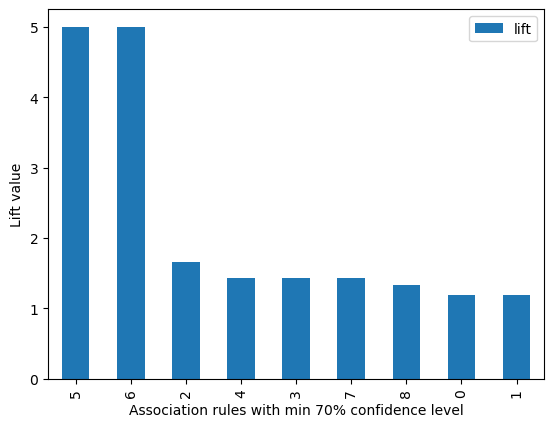

In [29]:
# Visualization of association rules wrt lift

df_70 = rules_70[['antecedents', 'lift']].sort_values('lift', ascending=False)
df_70.plot(kind='bar')
plt.xlabel('Association rules with min 70% confidence level')
plt.ylabel('Lift value')
plt.show()

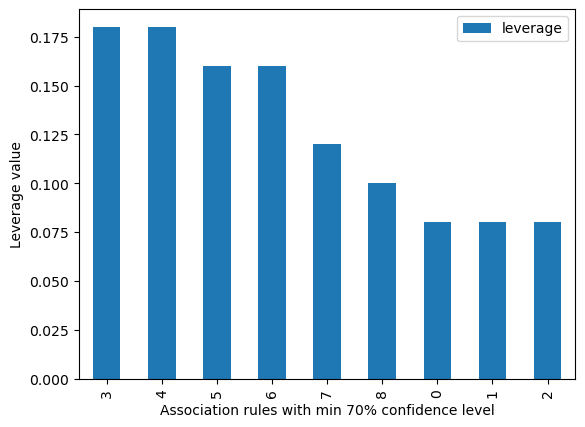

In [30]:
# Visualization of association rules wrt leverage

df_70 = rules_70[['antecedents', 'leverage']].sort_values('leverage', ascending=False)
df_70.plot(kind='bar')
plt.xlabel('Association rules with min 70% confidence level')
plt.ylabel('Leverage value')
plt.show()